##### 6.3 - Com  componentes Principais

In [1]:
# ============================================
# IMPORTANDO BIBLIOTECAS
# ============================================

import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler



In [2]:
# ============================================
# IMPORTANDO ARQUIVOS
# ============================================

# nome do arquivo
dir_treino = 'Modulo_Fase_TREINO.txt' 
dir_teste ='Modulo_Fase_TESTE.txt'

# Informa o cabeçalho das colunas
colunas = ['ID_TRILHA', 'G_SAÚDE', 'G_ISOLAMENTO', 'G_TRILHA', 'N_ISOLAMENTO', 'N_TRILHA', 'M_225886', 'M_246180', 'M_268298', 'M_292402', 'M_318672', 'M_347302', 'M_378504', 'M_412509', 'M_449569', 'M_489959', 'M_533978', 'M_581951', 'M_634235', 'M_691215', 'M_753315', 'M_820994', 'M_894753', 'M_975139', 'M_1062747', 'M_1158226', 'M_1262283', 'M_1375688', 'M_1499282', 'M_1633980', 'M_1780779', 'M_1940767', 'M_2115128', 'M_2305154', 'M_2512253', 'M_2737957', 'M_2983939', 'M_3252021', 'M_3544187', 'M_3862602', 'M_4209624', 'M_4587823', 'F_225886', 'F_246180', 'F_268298', 'F_292402', 'F_318672', 'F_347302', 'F_378504', 'F_412509', 'F_449569', 'F_489959', 'F_533978', 'F_581951', 'F_634235', 'F_691215', 'F_753315', 'F_820994', 'F_894753', 'F_975139', 'F_1062747', 'F_1158226', 'F_1262283', 'F_1375688', 'F_1499282', 'F_1633980', 'F_1780779', 'F_1940767', 'F_2115128', 'F_2305154', 'F_2512253', 'F_2737957', 'F_2983939', 'F_3252021', 'F_3544187', 'F_3862602', 'F_4209624', 'F_4587823']
# Carrega uma base de dados - TREINO
dataset_treino = pd.read_csv(dir_treino, names=colunas, skiprows=0, delimiter=';') 
#Carrega uma base de dados - TESTE
dataset_teste = pd.read_csv(dir_teste, names=colunas, skiprows=0, delimiter=';')  

In [3]:
dataset_treino.iloc[:,4:]

,N_ISOLAMENTO,N_TRILHA,M_225886,M_246180,M_268298,M_292402,M_318672,M_347302,M_378504,M_412509,...,F_2115128,F_2305154,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823
0,0.5,0.25,160660.0,147742.0,135860.0,124897.0,114802.0,105567.0,97018.0,89269.0,...,-75.96,-74.88,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51
1,0.5,2.75,125706.0,115581.0,106306.0,97732.0,89862.0,82657.0,75998.0,69879.0,...,-75.91,-74.83,-73.66,-72.37,-70.85,-69.17,-67.36,-65.34,-63.11,-60.60
2,0.5,3.00,123545.0,113604.0,104458.0,96073.0,88320.0,81209.0,74677.0,68634.0,...,-75.94,-74.87,-73.69,-72.40,-70.88,-69.21,-67.37,-65.37,-63.14,-60.67
3,0.5,0.50,152581.0,140354.0,129049.0,118616.0,109095.0,100293.0,92171.0,84735.0,...,-76.05,-74.96,-73.79,-72.49,-70.95,-69.24,-67.40,-65.36,-63.12,-60.60
4,0.5,0.75,146452.0,134718.0,123921.0,113932.0,104755.0,96268.0,88539.0,81396.0,...,-75.94,-74.86,-73.68,-72.38,-70.83,-69.15,-67.30,-65.26,-63.01,-60.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2.0,2.75,156883.0,144238.0,132763.0,122138.0,112378.0,103398.0,95140.0,87566.0,...,-76.75,-75.82,-74.82,-73.74,-72.32,-70.92,-69.10,-67.32,-65.48,-63.69
80,2.0,0.75,176453.0,162457.0,149530.0,137589.0,126642.0,116529.0,107240.0,98696.0,...,-76.75,-75.82,-74.83,-73.77,-72.36,-70.93,-69.16,-67.36,-65.56,-63.92
81,2.0,1.25,172189.0,158470.0,145777.0,134172.0,123500.0,113664.0,104593.0,96204.0,...,-76.70,-75.77,-74.79,-73.72,-72.31,-70.90,-69.09,-67.30,-65.47,-63.72
82,2.0,1.75,168858.0,155361.0,143139.0,131615.0,121064.0,111406.0,102473.0,94290.0,...,-76.80,-75.88,-74.88,-73.83,-72.40,-70.99,-69.15,-67.38,-65.56,-63.86


In [4]:
# Instanciar o objeto PCA com o número de componentes desejado
pca_dataset_treino = PCA(n_components=8)
pca_dataset_teste = PCA(n_components=8)

# Ajustar o modelo aos dados
pca_dataset_treino.fit(dataset_treino.iloc[:,4:])
pca_dataset_teste.fit(dataset_teste.iloc[:,4:])

PCA(n_components=8)

In [5]:
# Modulo e Fase -  TRANSFORMA OS VALORES PARA VALORES CONDIZENTES AOS DADOS ORIGINAIS

PCA1_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,0]
PCA2_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,1]
PCA3_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,2]
PCA4_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,3]
PCA5_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,4]
PCA6_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,5]
PCA7_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,6]
PCA8_treino = pca_dataset_treino.transform(dataset_treino.iloc[:,4:])[:,7]


PCA1_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,0]
PCA2_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,1]
PCA3_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,2]
PCA4_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,3]
PCA5_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,4]
PCA6_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,5]
PCA7_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,6]
PCA8_teste = pca_dataset_teste.transform(dataset_teste.iloc[:,4:])[:,7]

In [6]:
Aux_1 = pd.DataFrame([])
Aux_2 = pd.DataFrame([])

In [7]:
# Adiciona valores ao dataframe principal

Aux_1['PCA1'] = PCA1_treino
Aux_1['PCA2'] = PCA2_treino
Aux_1['PCA3'] = PCA3_treino
Aux_1['PCA4'] = PCA4_treino
Aux_1['PCA5'] = PCA5_treino
Aux_1['PCA6'] = PCA6_treino
Aux_1['PCA7'] = PCA7_treino
Aux_1['PCA8'] = PCA8_treino

Aux_2['PCA1'] = PCA1_teste
Aux_2['PCA2'] = PCA2_teste
Aux_2['PCA3'] = PCA3_teste
Aux_2['PCA4'] = PCA4_teste
Aux_2['PCA5'] = PCA5_teste
Aux_2['PCA6'] = PCA6_teste
Aux_2['PCA7'] = PCA7_teste
Aux_2['PCA8'] = PCA8_teste



In [219]:
# Normalizar os dados
# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste e transforme os dados do DataFrame

#Aux_1_N = pd.DataFrame(scaler.fit_transform(Aux_1), columns=Aux_1.columns)

#Aux_2_N = pd.DataFrame(scaler.fit_transform(Aux_2), columns=Aux_2.columns)


In [235]:
pd.concat( [ dataset_treino.iloc[:,2:4], Aux_1 ], axis=1 )

,G_ISOLAMENTO,G_TRILHA,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,1.0,1.0,-10249.180072,-761.909512,-4.079396,-41.178895,5.956597,10.371033,-46.813644,33.245297
1,1.0,11.0,-98719.115910,-176.888810,37.148967,-13.051105,-9.290513,-7.701096,-7.607849,18.933090
2,1.0,12.0,-104271.201983,-240.488195,-6.617849,-30.423310,1.702548,17.322665,1.797560,-8.014727
3,1.0,2.0,-30774.554114,-841.482888,-51.344186,-106.839040,33.168276,45.780929,39.356398,30.594634
4,1.0,3.0,-46075.988940,-550.773138,20.153036,-116.182240,13.355438,6.360043,14.730665,3.743838
...,...,...,...,...,...,...,...,...,...,...
79,4.0,11.0,-18276.114465,1716.804853,-298.448692,78.540973,-63.854658,-10.621255,-18.801807,13.064257
80,4.0,3.0,32329.033384,2214.630837,-182.840282,-20.259727,39.642327,-33.110097,-3.248225,-19.331582
81,4.0,5.0,21222.467673,2183.808166,-258.327427,77.861618,29.255856,-13.509666,34.231343,-34.069719
82,4.0,7.0,12515.068463,1764.519865,-342.245468,-105.271721,-45.989167,-55.819781,-48.438491,22.020430


In [8]:
array_X_treino = pd.concat( [ dataset_treino.iloc[:,2:4], Aux_1 ], axis=1 ).values
array_Y_treino = dataset_treino.iloc[:,1].values

array_X_teste = pd.concat( [ dataset_teste.iloc[:,2:4], Aux_2 ], axis=1 ).values
array_Y_teste = dataset_teste.iloc[:,1].values

#===================

A = array_X_treino.astype(float)
scaler_train = StandardScaler().fit(A)
X_train = scaler_train.transform(A)

Y_train = array_Y_treino .astype(int)

B = array_X_teste.astype(float)
scaler_test = StandardScaler().fit(B)
X_test = scaler_test.transform(B)

Y_test = array_Y_teste.astype(int)


In [10]:
X_train.shape

(84, 10)

###### 6.3.1 - Sem normalização dos dados

In [202]:
# ============================================
# ============================================
#
# CRIANDO PARAMETROS E MODELOS DE APRENDIZAGEM DE MÁQUINA
#
# ============================================
# ============================================

### Parâmetros

# número de fols - validação cruzada
num_folds = 10

# metrica
scoring = 'accuracy'

# definindo uma semente global
np.random.seed(7) 

# ============================================
# ============================================


In [203]:
# definindo uma semente global
np.random.seed(7)

# Tuning do KNN



# Definir os hiperparâmetros para ajustar
#==#
# Principal parametro. Define o número de vizinhos.
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
# Determina o algoritmo de calculo a ser utilizado
distancias = ['euclidean', 'manhattan', 'minkowski']
#
param_grid = dict(n_neighbors=k, 
                  metric=distancias)

# Modelo de treinamento definido
model = KNeighborsClassifier()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print('Melhor: %f usando %s' %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.804167 usando {'metric': 'euclidean', 'n_neighbors': 1}
0.804167 (0.261499): {'metric': 'euclidean', 'n_neighbors': 1}
0.731944 (0.284234): {'metric': 'euclidean', 'n_neighbors': 3}
0.718056 (0.236849): {'metric': 'euclidean', 'n_neighbors': 5}
0.644444 (0.251247): {'metric': 'euclidean', 'n_neighbors': 7}
0.726389 (0.238068): {'metric': 'euclidean', 'n_neighbors': 9}
0.691667 (0.256610): {'metric': 'euclidean', 'n_neighbors': 11}
0.669444 (0.319130): {'metric': 'euclidean', 'n_neighbors': 13}
0.630556 (0.319396): {'metric': 'euclidean', 'n_neighbors': 15}
0.619444 (0.255208): {'metric': 'euclidean', 'n_neighbors': 17}
0.583333 (0.279370): {'metric': 'euclidean', 'n_neighbors': 19}
0.522222 (0.263684): {'metric': 'euclidean', 'n_neighbors': 21}
0.718056 (0.191953): {'metric': 'manhattan', 'n_neighbors': 1}
0.734722 (0.255906): {'metric': 'manhattan', 'n_neighbors': 3}
0.708333 (0.236029): {'metric': 'manhattan', 'n_neighbors': 5}
0.659722 (0.260004): {'metric': 'manhattan', '

In [204]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do SVM

# Definir os hiperparâmetros para ajustar
#==#
# Significa o valor de regularização (inversamente proporcional ao grau de regularização)
c_values = [0.1, 0.5, 1.0, 1.5, 2.0]
# Significa a selecção do kernel para o algoritmo de aprendizagem automática SVM.
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
#
param_grid = dict(C=c_values, 
                  kernel=kernel_values)

# Modelo de treinamento definido
model = SVC()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 1.000000 com {'C': 1.0, 'kernel': 'linear'}
0.837500 (0.316475): {'C': 0.1, 'kernel': 'linear'}
0.344444 (0.312719): {'C': 0.1, 'kernel': 'poly'}
0.175000 (0.164476): {'C': 0.1, 'kernel': 'rbf'}
0.175000 (0.164476): {'C': 0.1, 'kernel': 'sigmoid'}
0.911111 (0.266667): {'C': 0.5, 'kernel': 'linear'}
0.622222 (0.283877): {'C': 0.5, 'kernel': 'poly'}
0.666667 (0.253220): {'C': 0.5, 'kernel': 'rbf'}
0.351389 (0.301299): {'C': 0.5, 'kernel': 'sigmoid'}
1.000000 (0.000000): {'C': 1.0, 'kernel': 'linear'}
0.658333 (0.310826): {'C': 1.0, 'kernel': 'poly'}
0.801389 (0.235788): {'C': 1.0, 'kernel': 'rbf'}
0.738889 (0.228960): {'C': 1.0, 'kernel': 'sigmoid'}
1.000000 (0.000000): {'C': 1.5, 'kernel': 'linear'}
0.697222 (0.297547): {'C': 1.5, 'kernel': 'poly'}
0.851389 (0.239441): {'C': 1.5, 'kernel': 'rbf'}
0.547222 (0.104157): {'C': 1.5, 'kernel': 'sigmoid'}
1.000000 (0.000000): {'C': 2.0, 'kernel': 'linear'}
0.731944 (0.290809): {'C': 2.0, 'kernel': 'poly'}
0.875000 (0.230070): {'C': 2.0

In [145]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do Decision Tree Classifier


# Definir os hiperparâmetros para ajustar
#==#
# Criterio de divisão da árvore de decisão
criterion_values = ['gini', 'entropy', 'log_loss']
# Profundidade máxima da árvore
max_depth_values = [None, 5, 10, 15]
# Número mínimo de amostras para dividir um nó interno
min_samples_split_values = [2, 5, 10]
# Número mínimo de amostras em um nó folha
min_samples_leaf_values = [1, 2, 3]
# Agrupamento dos hiperparâmetros
#
param_grid = dict(criterion = criterion_values, 
                  max_depth = max_depth_values, 
                  min_samples_split = min_samples_split_values, 
                  min_samples_leaf = min_samples_leaf_values)


# Modelo de treinamento definido
model = DecisionTreeClassifier()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

                  
# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.872222 com {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.861111 (0.207963): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.872222 (0.212077): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.861111 (0.213817): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.836111 (0.225051): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.836111 (0.225051): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.861111 (0.213817): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.872222 (0.187351): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.872222 (0.187351): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.861111 (0.18268

In [205]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do NB


# Definir os hiperparâmetros para ajustar
#==#
# Parametro de suavização da variância do cálculo da estabilidade
var_smoothing_values = [5e-2, 5e-5, 5e-8]

param_grid = dict(var_smoothing = var_smoothing_values)

# Modelo de treinamento definido
model = GaussianNB()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.779167 com {'var_smoothing': 0.05}
0.779167 (0.308474): {'var_smoothing': 0.05}
0.779167 (0.303367): {'var_smoothing': 5e-05}
0.779167 (0.303367): {'var_smoothing': 5e-08}


In [147]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do LR

# Definir os hiperparâmetros para ajustar
#==#
# Significa o valor de regularização (inversamente proporcional ao grau de regularização)
c_values = [0.01,0.1, 1, 10]
# Especifica o valor de penalidade
penalty_values = [None, 'l1', 'elasticnet', 'l2', 'elasticnet']
# Algoritmo a utilizar no problema de optimização
solver_values = ['lbfgs', 'newton-cg', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#
param_grid = dict(C = c_values, 
                  penalty = penalty_values,
                 solver = solver_values)

# Modelo de treinamento definido
model = LogisticRegression()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\uti

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\uti

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\uti

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\uti

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\ana

C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\l

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWa

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\uti

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Melhor: 1.000000 com {'C': 0.01, 'penalty': None, 'solver': 'newton-cholesky'}
0.975000 (0.050000): {'C': 0.01, 'penalty': None, 'solver': 'lbfgs'}
0.504167 (0.359347): {'C': 0.01, 'penalty': None, 'solver': 'newton-cg'}
nan (nan): {'C': 0.01, 'penalty': None, 'solver': 'liblinear'}
0.504167 (0.359347): {'C': 0.01, 'penalty': None, 'solver': 'newton-cg'}
1.000000 (0.000000): {'C': 0.01, 'penalty': None, 'solver': 'newton-cholesky'}
0.616667 (0.199459): {'C': 0.01, 'penalty': None, 'solver': 'sag'}
0.604167 (0.202440): {'C': 0.01, 'penalty': None, 'solver': 'saga'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
0.975000 (0.050000): {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cholesky'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'sag'}
0.604167 (0.202440): {'C': 0.01, 'penalty': '

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by 

## ===== TESTANDO PRA VALER =====

In [11]:
# ============================================
# CRIANDO PARAMETROS E MODELOS DE APRENDIZAGEM DE MÁQUINA
# ============================================
### Parâmetros
# número de fols - validação cruzada
num_folds = 10
# metrica
scoring = 'accuracy'
# definindo uma semente global
np.random.seed(7) 

In [12]:
# Criação dos modelos


model_KNN = KNeighborsClassifier(metric='manhattan',n_neighbors=13)
model_CART = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,min_samples_split=5)
model_NB = GaussianNB(var_smoothing= 0.05)
model_SVN = SVC(C= 1.0, kernel= 'linear')
model_LR = LogisticRegression(C=0.01, penalty = None, solver = 'newton-cholesky')


In [13]:
# ============================================
# ============================================
# RESULTADO DA MÉDIA DOS FOLDS - POR VALIDAÇÃO CRUZADA
# ============================================
# ============================================

kfold = KFold(n_splits=num_folds)


cv_results_KNN = cross_val_score(model_KNN, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('KNN', cv_results_KNN.mean(), cv_results_KNN.std())
print(msg)

cv_results_CART = cross_val_score(model_CART, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('CART', cv_results_CART.mean(), cv_results_CART.std())
print(msg)

cv_results_NB = cross_val_score(model_NB, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('NB', cv_results_NB.mean(), cv_results_NB.std())
print(msg)

cv_results_SVN = cross_val_score(model_SVN, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('SVN', cv_results_SVN.mean(), cv_results_SVN.std())
print(msg)

cv_results_LR = cross_val_score(model_LR, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('LR', cv_results_LR.mean(), cv_results_LR.std())
print(msg)

# ============================================
# ============================================

KNN: 0.743056 (0.264418)
CART: 0.790278 (0.211864)
NB: 0.813889 (0.297443)
SVN: 0.951389 (0.081756)
LR: 0.975000 (0.050000)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

In [14]:
# ============================================
# ============================================
# METRICAS USANDO OS VALORES DE TESTE
# ============================================
# ============================================

labels = ['Trilha com falha', 'Trilha sem falha']

# ============================================
# KNN
# ============================================

model_KNN.fit(X_train, Y_train)
y_pred_KNN = model_KNN.predict(X_test)

print('=======')
print('=======')
print('KNN - f1-score - macro = ', f1_score(Y_test, y_pred_KNN, average='macro')) #,labels=None))
print('KNN - Precision score = ', precision_score(Y_test, y_pred_KNN))
print('KNN - Accuracy score = ', accuracy_score(Y_test, y_pred_KNN))
print('=======')
print(classification_report(Y_test, y_pred_KNN, target_names=labels))
print('=======')

# ============================================
# CART
# ============================================

model_CART.fit(X_train, Y_train)
y_pred_CART = model_CART.predict(X_test)

print('=======')
print('CART - f1-score - macro = ', f1_score(Y_test, y_pred_CART, average='macro')) #,labels=None))
print('CART - Precision score = ', precision_score(Y_test, y_pred_CART))
print('CART - Accuracy score = ', accuracy_score(Y_test, y_pred_CART))
print('=======')
print(classification_report(Y_test, y_pred_CART, target_names=labels))
print('=======')

# ============================================
# NB
# ============================================

model_NB.fit(X_train, Y_train)
y_pred_NB = model_NB.predict(X_test)

print('=======')
print('NB - f1-score - macro = ', f1_score(Y_test, y_pred_NB, average='macro')) #,labels=None))
print('NB - Precision score = ', precision_score(Y_test, y_pred_NB))
print('NB - Accuracy score = ', accuracy_score(Y_test, y_pred_NB))
print('=======')
print(classification_report(Y_test, y_pred_NB, target_names=labels))
print('=======')

# ============================================
# SVN
# ============================================

model_SVN.fit(X_train, Y_train)
y_pred_SVN = model_SVN.predict(X_test)

print('=======')
print('SVN - f1-score - macro = ', f1_score(Y_test, y_pred_SVN, average='macro')) #,labels=None))
print('SVN - Precision score = ', precision_score(Y_test, y_pred_SVN))
print('SVN - Accuracy score = ', accuracy_score(Y_test, y_pred_SVN))
print('=======')
print(classification_report(Y_test, y_pred_SVN, target_names=labels))
print('=======')

# ============================================
# LR
# ============================================

model_LR.fit(X_train, Y_train)
y_pred_LR = model_LR.predict(X_test)

print('=======')
print('LR - f1-score - macro = ', f1_score(Y_test, y_pred_LR, average='macro')) #,labels=None))
print('LR - Precision score = ', precision_score(Y_test, y_pred_LR))
print('LR - Accuracy score = ', accuracy_score(Y_test, y_pred_LR))
print('=======')
print(classification_report(Y_test, y_pred_LR, target_names=labels))
print('=======')
print('=======')
    

# ============================================
# ============================================

KNN - f1-score - macro =  0.2391304347826087
KNN - Precision score =  0.0
KNN - Accuracy score =  0.3142857142857143
                  precision    recall  f1-score   support

Trilha com falha       0.65      0.38      0.48        29
Trilha sem falha       0.00      0.00      0.00         6

        accuracy                           0.31        35
       macro avg       0.32      0.19      0.24        35
    weighted avg       0.54      0.31      0.40        35

CART - f1-score - macro =  0.3269230769230769
CART - Precision score =  0.0
CART - Accuracy score =  0.4857142857142857
                  precision    recall  f1-score   support

Trilha com falha       0.74      0.59      0.65        29
Trilha sem falha       0.00      0.00      0.00         6

        accuracy                           0.49        35
       macro avg       0.37      0.29      0.33        35
    weighted avg       0.61      0.49      0.54        35

NB - f1-score - macro =  0.40340909090909094
NB - Precision s

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


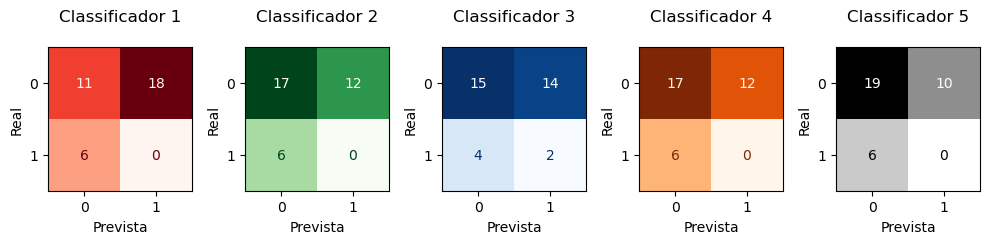

In [15]:
# ============================================
# ============================================
# METRICAS USANDO OS VALORES DE TESTE
# ============================================
# ============================================

# Criação dos subplots

fig, axes = plt.subplots(1, 5, figsize=(10, 5))

##########################
# 1 - model_KNN
##########################

# Matriz de confusão - SVN
CM_KNN = confusion_matrix(Y_test, y_pred_KNN)
disp0 = ConfusionMatrixDisplay(confusion_matrix=CM_KNN)
disp0.plot(ax=axes[0], cmap='Reds', values_format='d', colorbar=False)
#
axes[0].set_title('Classificador 1\n')#\n
axes[0].set_xlabel('Prevista')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[0].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 2 - model_CART
##########################

# Matriz de confusão - CART
CM_CART = confusion_matrix(Y_test, y_pred_CART)
disp1 = ConfusionMatrixDisplay(confusion_matrix=CM_CART)
disp1.plot(ax=axes[1], cmap='Greens', values_format='d', colorbar=False)
#
axes[1].set_title('Classificador 2\n')#\n
axes[1].set_xlabel('Prevista')
axes[1].set_ylabel('Real')
axes[1].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[1].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 3 - model_NB
##########################

# Matriz de confusão - NB
CM_NB = confusion_matrix(Y_test, y_pred_NB)
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM_NB)
disp2.plot(ax=axes[2], cmap='Blues', values_format='d', colorbar=False)
#
axes[2].set_title('Classificador 3\n')#\n
axes[2].set_xlabel('Prevista')
axes[2].set_ylabel('Real')
axes[2].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[2].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 4 - model_SVN
##########################

# Matriz de confusão - SVN
CM_SVN = confusion_matrix(Y_test, y_pred_SVN)
disp3 = ConfusionMatrixDisplay(confusion_matrix=CM_SVN)
disp3.plot(ax=axes[3], cmap='Oranges', values_format='d', colorbar=False)
#
axes[3].set_title('Classificador 4\n')#\n
axes[3].set_xlabel('Prevista')
axes[3].set_ylabel('Real')
axes[3].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[3].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 5 - model_LR
##########################

# Matriz de confusão - LR
CM_LR = confusion_matrix(Y_test, y_pred_LR)
disp4 = ConfusionMatrixDisplay(confusion_matrix=CM_LR)
disp4.plot(ax=axes[4], cmap='Greys', values_format='d', colorbar=False)
#
axes[4].set_title('Classificador 5\n')#\n
axes[4].set_xlabel('Prevista')
axes[4].set_ylabel('Real')
axes[4].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[4].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')
##########################
##########################

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()


# ============================================
# ============================================